In [1]:
!pip install praat-parselmouth

     |████████████████████████████████| 10.7 MB 124 kB/s eta 0:00:01    |█████▊                          | 1.9 MB 61 kB/s eta 0:02:23


In [7]:
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
from librosa import display
import urllib.parse

import parselmouth

import seaborn as sns
file = open('/home/omer/Desktop/labled.txt', 'r')
path = '/home/omer/Desktop/'

In [3]:
sns.set() # Use seaborn's default style to make attractive graphs
plt.rcParams['figure.dpi'] = 100 # Show nicely large images in this notebook

In [4]:
def print_wavefront(data):
    y_ = None
    sr_ = None
    y, sr = librosa.load(data)
    y_ = y
    sr_ = sr
    fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
    librosa.display.waveplot(y, sr=sr, ax=ax[0])
    ax[0].set(title='Monophonic')
    ax[0].label_outer()
    y, sr = librosa.load(data, mono=False)
    librosa.display.waveplot(y, sr=sr, ax=ax[1])
    ax[1].set(title='Stereo')
    ax[1].label_outer()
    y, sr = librosa.load(data)
    y_harm, y_perc = librosa.effects.hpss(y)
    librosa.display.waveplot(y_harm, sr=sr, alpha=0.25, ax=ax[2])
    librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2])
    ax[2].set(title='Harmonic + Percussive')
    return y_, sr_

In [5]:
def getLables(file):
    covid = []
    healthy = []
    for lines in file:
    # print(lines)
        if 'healthy' in lines:
              healthy.append(lines.split(' , ')[0])
        else:
          # print(lines.split(' , ')[1])
          covid.append(lines.split(' , ')[0])
    return covid, healthy
covid, healthy = getLables(file)

In [8]:
def getRand(path, data):
  choice = list(range(len(data)))
  random.shuffle(choice)
  to_return = []
  choices = []
  samplingRate = []
  for i in range(0, len(data-1)):
    try:
      snd = parselmouth.Sound(path + data[choice[i]] + '.wav')
      # y, sr = librosa.load(path + data[choice[i]] + '.wav')
      # samplingRate.append(sr)
      to_return.append(snd)
      # choices.append(path + data[choice[i]] + '.wav')
    except:
      continue
  return to_return

In [60]:
def plotAmplitude(snd):
    plt.figure()
    plt.plot(snd.xs(), snd.values.T)
    plt.xlim([snd.xmin, snd.xmax])
    plt.xlabel("time [s]")
    plt.ylabel("amplitude")
    plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")
    

In [61]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
    return plt
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")
    return plt

In [62]:
def draw_pitch(pitch):
  # Extract selected pitch contour, and
  # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")
def convertPitch(snd):
    pitch = snd.to_pitch()
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax])
    plt.show()
    

In [63]:
def Spec_Intensity(snd):
    intensity = snd.to_intensity()
    spectrogram = snd.to_spectrogram()
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_intensity(intensity)
    plt.xlim([snd.xmin, snd.xmax])
    plt.show()

In [64]:
def returnSND(rhea):
  rvalues = []
  for data in rhea:
    rvalues.append(data.values.reshape(data.values.shape[1]))
  maxx = 0
  max_snd = 0
  i  = 0
  for data in rvalues:
    
    if data.shape[0]>maxx:
      maxx = data.shape[0]
      max_snd = i
    i += 1
  to_return = []
  for data in rvalues:
    d = data.tolist()
    while len(d) != maxx:
      d.append(0.0)
    to_return.append(np.array(d))
  rmean = np.mean(np.array(to_return), axis = 0)
  rhea[max_snd].values = rmean.reshape(1, rmean.shape[0])
  plotGraphs(rhea[max_snd])
  return rhea[max_snd]

In [65]:
def plotGraphs(alpha):
    Spec_Intensity(alpha)
    plotAmplitude(alpha)
    convertPitch(alpha)

In [66]:
snd_cov = parselmouth.Sound(path + 'covid' + '.wav')
snd_hea = parselmouth.Sound(path + 'healthy' + '.wav')
snd_curr = parselmouth.Sound(path + 'Current.wav')

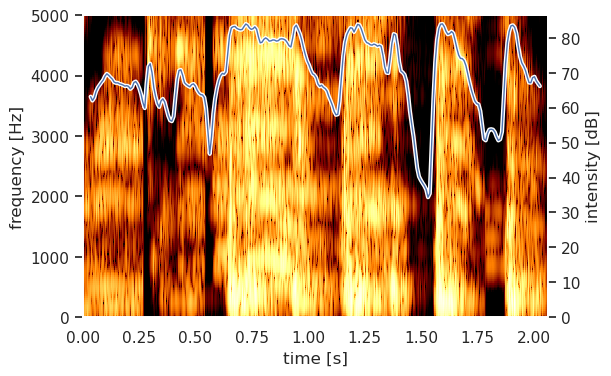

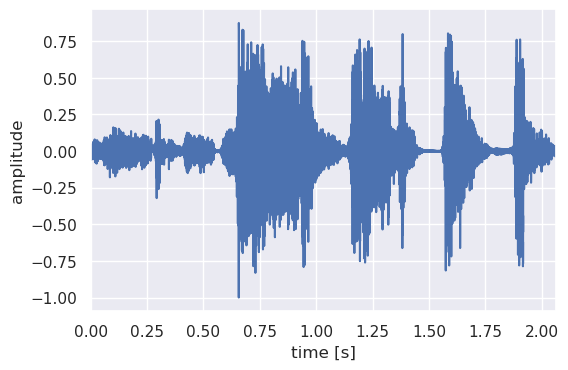

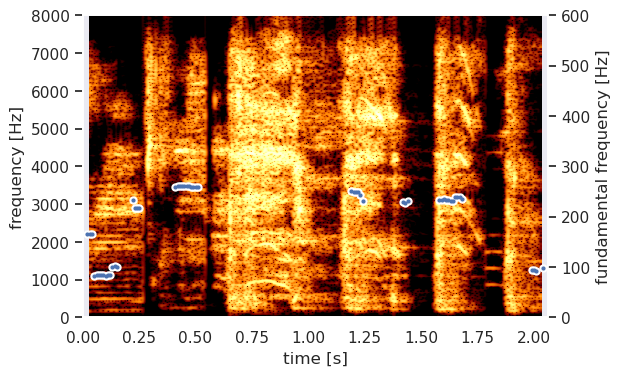

In [67]:
plotGraphs(snd_cov)

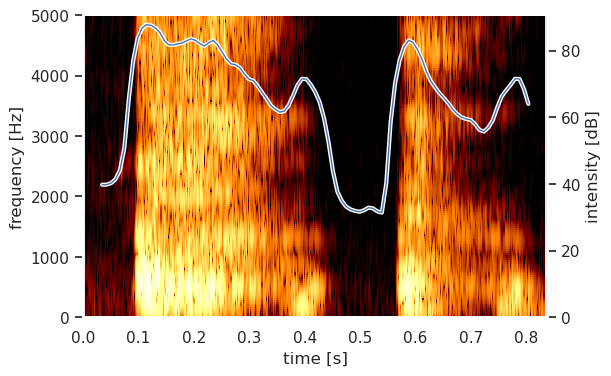

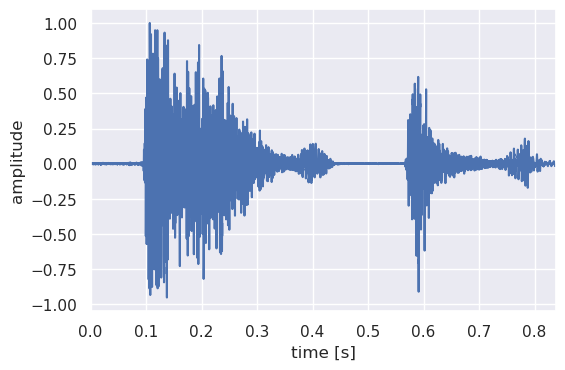

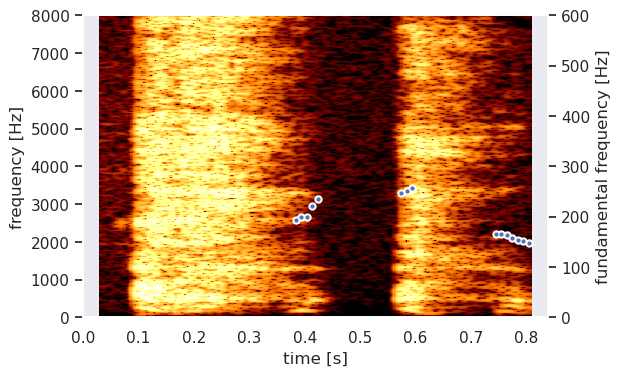

In [68]:
plotGraphs(snd_hea)

In [85]:
def timeSeries(y, sr):
  duration = len(y)/sr
  time = np.arange(0,duration,1/sr)
  plt.plot(time,y)
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')
  plt.title('Time Series')
#   plt.show()

In [97]:
def SignalTime(y_sr):
  signalAmplitude = np.sin(y_sr[0])  
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.title("Signal")
  plt.phase_spectrum(signalAmplitude)
  plt.title("Phase Spectrum of the Signal")
#   plt.show()

In [69]:
y_hea, y_hsr = librosa.load(path + 'healthy' + '.wav')
y_cov, y_csr = librosa.load(path + 'covid' + '.wav') 
y_curr, y_ccsr = librosa.load(path + 'current' + '.wav')

In [ ]:
SignalTime((y_cov, y_csr))
SignalTime((y_hea, y_hsr))
SignalTime((y_curr, y_ccsr))


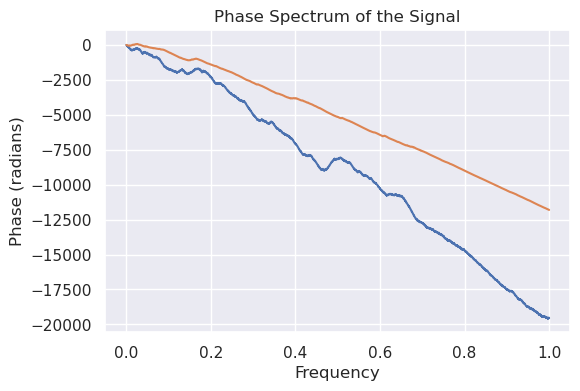

In [98]:
timeSeries(y_cov, y_csr)
timeSeries(y_hea, y_hsr)
timeSeries(y_curr, y_ccsr)


In [99]:
def magnitude_spectrum(X):
  nse = np.random.randn(len(X))
  r = np.exp(-X / 0.05)
  dt = 0.0001
  Fs = 1 / dt
  s = 0.1 * np.sin(2 * np.pi * X) + nse
  plt.magnitude_spectrum(s, Fs = Fs)
  plt.title('Covid Comparison', fontweight ="bold")

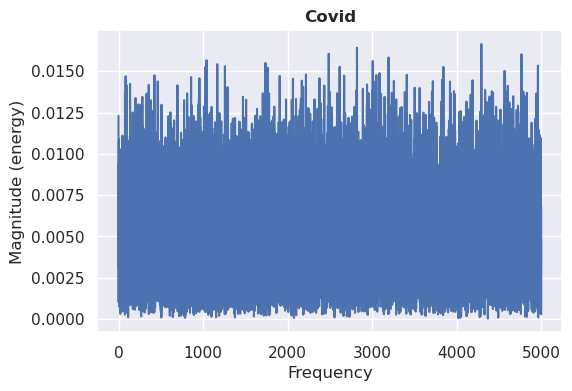

In [100]:
magnitude_spectrum(y_curr)
magnitude_spectrum(y_hea)
magnitude_spectrum(y_cov)